In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.vector import CoordSys3D

In [2]:
def mod(vector):
    tamanho = sp.simplify(sp.sqrt(sp.vector.dot(vector,vector)))
    return tamanho

In [3]:
C = CoordSys3D('C')
t = sp.symbols('t')

r = sp.sin(t)*C.i+sp.cos(t)*C.j+t*C.k
r_1 = sp.diff(r,t)
r_2 = sp.diff(r_1,t)

T = r_1/mod(r_1)
T_1 = sp.diff(T,t)

N = T_1/mod(T_1)
B = sp.simplify(sp.vector.cross(T,N))

In [4]:
r_1 = r_1/mod(r_1)
r_2 = r_2/mod(r_2)

In [5]:
############### FUNÇÃO ################
rx = sp.lambdify(t, r.dot(C.i), 'numpy')
ry = sp.lambdify(t, r.dot(C.j), 'numpy')
rz = sp.lambdify(t, r.dot(C.k), 'numpy')

########### VETOR TANGENTE ############
Tx = sp.lambdify(t, T.dot(C.i), 'numpy')
Ty = sp.lambdify(t, T.dot(C.j), 'numpy')
Tz = sp.lambdify(t, T.dot(C.k), 'numpy')

############ VETOR NORMAL #############
Nx = sp.lambdify(t, N.dot(C.i), 'numpy')
Ny = sp.lambdify(t, N.dot(C.j), 'numpy')
Nz = sp.lambdify(t, N.dot(C.k), 'numpy')

########### VETOR BINORMAL ############
Bx = sp.lambdify(t, B.dot(C.i), 'numpy')
By = sp.lambdify(t, B.dot(C.j), 'numpy')
Bz = sp.lambdify(t, B.dot(C.k), 'numpy')

In [6]:
t_vals = np.linspace(0, 4*np.pi, 80)
t_vals_n = np.arange(0, 80, 1)

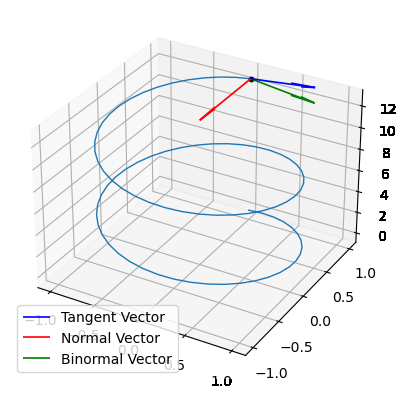

In [7]:
for i_,n_ in zip(t_vals,t_vals_n):
    ax = plt.axes(projection='3d')
    ax.plot(rx(t_vals),ry(t_vals),rz(t_vals),linewidth=1)
    ax.scatter(rx(i_),ry(i_),rz(i_),c='black',s=10)
    ax.quiver(rx(i_),ry(i_),rz(i_),Tx(i_),Ty(i_),Tz(i_),color='blue',linewidth=1.2,label='Tangent Vector')
    ax.quiver(rx(i_),ry(i_),rz(i_),Nx(i_),Ny(i_),Nz(i_),color='red',linewidth=1.2,label='Normal Vector')
    ax.quiver(rx(i_),ry(i_),rz(i_),Bx(i_),By(i_),Bz(i_),color='green',linewidth=1.2, label='Binormal Vector')
    plt.legend()
    plt.savefig('/home/antenor/Documents/IC/b/'+str(n_)+'.png')